In [33]:
import numpy
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn import model_selection, neighbors, metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale, StandardScaler, normalize

# PARÂMETROS
random_seed = 42

# KNN
ks = [k for k in range(1, 27, 2)]  # Número de vizinhos
distance_metric = 'minkowski'  # euclidean, manhattan, chebyshev, minkowski
weights = 'uniform'
n_splits = 10  # Número de folds
change_operation_point = False



In [23]:
#1.Carregamento de dados: Identificação de feature e target
c = pd.read_csv("heart.csv")
features = c[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
target = c[['HeartDisease']]
print(target.head())

   HeartDisease
0             0
1             1
2             0
3             1
4             0


In [27]:
#2.Divisão de dados: Separe os dados em conjuntos de treino e validação
train_f, test_f,train_t, test_t = model_selection.train_test_split (features, target, train_size=0.8, random_state=random_seed)
print ('TREINAMENTO FEATURES:\n', train_f, train_f.shape)
print ('TREINAMENTO TARGET:\n', train_t, train_t.shape)
print ('TESTE FEATURES:\n', test_f, test_f.shape)
print ('TESTE TARGET:\n', test_t, test_t.shape)

TREINAMENTO FEATURES:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
795   42   M           NAP        120          240          1     Normal   
25    36   M           NAP        130          209          0     Normal   
84    56   M           ASY        150          213          1     Normal   
10    37   F           NAP        130          211          0     Normal   
344   51   M           ASY        120            0          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
106   48   F           ASY        120          254          0         ST   
270   45   M           ASY        120          225          0     Normal   
860   60   M           ASY        130          253          0     Normal   
435   60   M           ASY        152            0          0         ST   
102   40   F           ASY        150          392          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope    minmax    zscore 

In [25]:
#3.Transformação de dados: Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados
Cholesterol= features[['Cholesterol']]
features['minmax'] = minmax_scale(Cholesterol)
features['zscore'] = StandardScaler().fit_transform(Cholesterol)
features['l2norm'] = normalize(Cholesterol, axis=0)
print(features.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope    minmax    zscore    l2norm  
0              N      0.0       Up  0.479270  0.825070  0.042042  
1              N      1.0     Flat  0.298507 -0.171961  0.026186  
2              N      0.0       Up  0.469320  0.770188  0.041169  
3              Y      1.5     Flat  0.354892  0.139040  0.031132  
4              N      0.0       Up  0.323383 -0.034755  0.028368  


In [29]:
#4.Modelagem de K-Nearest Neighbors (KNN): Implemente o algoritmo KNN, compreendedo suas nuances e aplicabilidade
features = c[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]
train_f, test_f,train_t, test_t = model_selection.train_test_split (features, target, train_size=0.8, random_state=random_seed)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
model = knn.fit (train_f, train_t)
predicted_t = model.predict (test_f)
print (predicted_t)
print (test_t)

[0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1]
     HeartDisease
668             0
30              1
377             1
535             1
807             0
..            ...
211             1
745             1
584             1
878             0
451             1

[184 rows x 1 columns]


c:\Users\Ander\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
#5.Avaliação do modelo: Avalie a qualidade do modelo desenvolvido usando acurária
acuracia=metrics.accuracy_score (test_t, predicted_t)
print(f"Acurácia: {100.0*acuracia:.1f}%")

Acurácia: 65.2%


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


c:\Users\Ander\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Ander\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Ander\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Ander\miniconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

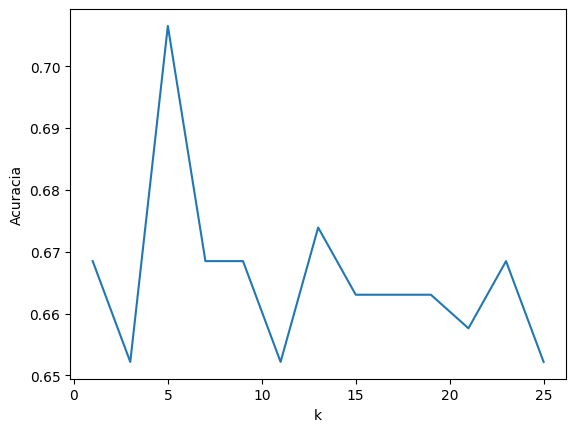

In [ ]:
acuracias = []
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    model = knn.fit (train_f, train_t)
    predicted_t = model.predict (test_f)
    acuracia = metrics.accuracy_score (test_t, predicted_t)
    acuracias.append (acuracia)
plt.plot (ks, acuracias)
plt.xlabel ("k")
plt.ylabel ("Acuracia")
plt.show ()